<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

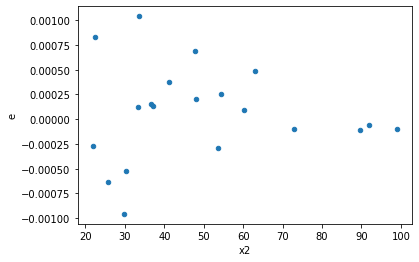

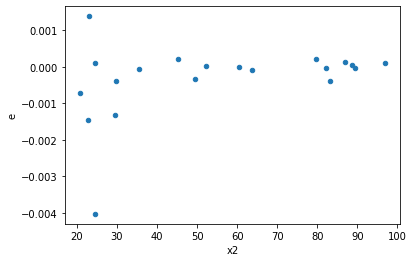

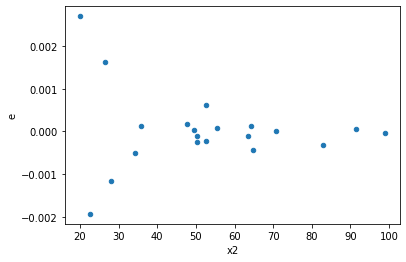

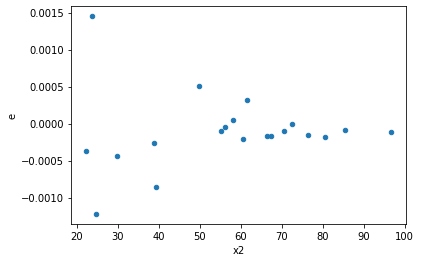

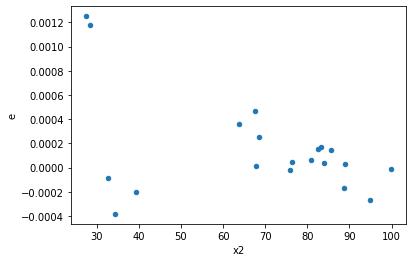

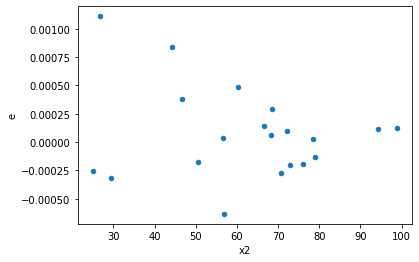

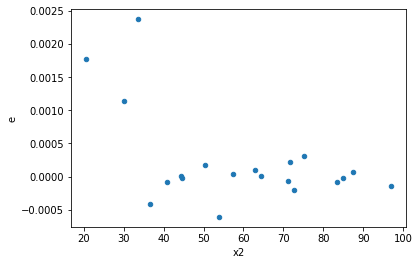

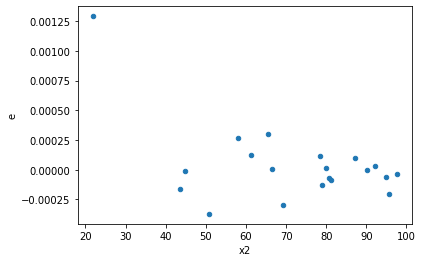

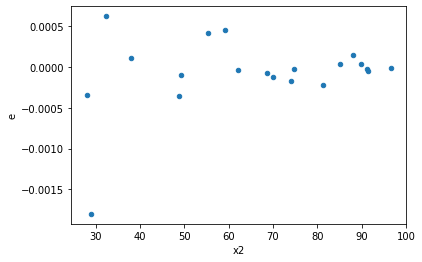

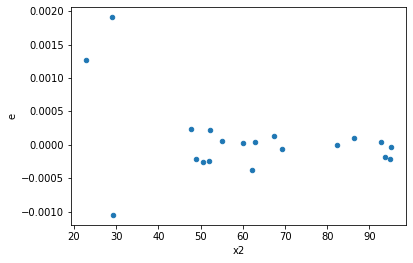

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,5.0,3.953949543765617e-06,7.947085101152108e-06,4.393277270850686e-07,1.5894170202304216e-06,3.6178390805792624,0.17050905656088222,0.9147454717195589,0.08525452828044111,Reject005=1 : Homoscedasticity
5.0,12.0,2.0,1.1536722338845066e-06,1.387274476978615e-06,9.613935282370888e-08,6.936372384893075e-07,7.214914788965065,0.25610338784403286,0.8719483060779836,0.12805169392201643,Reject005=1 : Homoscedasticity
9.0,6.0,8.0,5.608973745559238e-07,4.130714819820575e-06,9.348289575932064e-08,5.163393524775718e-07,5.5233564202688985,0.030631164392944887,0.9846844178035276,0.015315582196472444,Reject005=0 : Heteroscedasticity
10.0,7.0,7.0,5.588319281388797e-07,6.064679708069542e-06,7.983313259126853e-08,8.66382815438506e-07,10.852421636443006,0.0054869755438198275,0.9972565122280901,0.0027434877719099138,Reject005=0 : Heteroscedasticity
13.0,5.0,9.0,2.2080979575880986e-08,2.8811509257713597e-06,4.4161959151761975e-09,3.201278806412622e-07,72.48951060824704,1.0774083218922925e-06,0.999999461295839,5.387041609461463e-07,Reject005=0 : Heteroscedasticity
15.0,8.0,6.0,1.3029176488780893e-06,2.1382726703407737e-06,1.6286470610976116e-07,3.5637877839012896e-07,2.188189122755367,0.35568121954862186,0.8221593902256891,0.17784060977431093,Reject005=1 : Homoscedasticity
18.0,3.0,11.0,2.162811314954045e-09,2.9971731218301085e-06,7.209371049846816e-10,2.724702838027371e-07,377.9390489389869,4.512701323733381e-11,0.9999999999774365,2.2563506618666906e-11,Reject005=0 : Heteroscedasticity
21.0,9.0,5.0,9.787531098107087e-07,2.5197816335016055e-06,1.0875034553452318e-07,5.03956326700321e-07,4.634066441106969,0.10601680476331454,0.9469915976183427,0.05300840238165727,Reject005=1 : Homoscedasticity
22.0,6.0,8.0,4.7141783343224737e-07,9.437713610940563e-06,7.856963890537456e-08,1.1797142013675704e-06,15.014886383636822,0.0011600495727230875,0.9994199752136385,0.0005800247863615438,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,1.8498732994444755e-06,1.0923908878599267e-06,2.0554147771605284e-07,2.1847817757198535e-07,1.0629396071278812,0.9983225523225239,Reject005=1 : Homoscedasticity
1.0,9.0,5.0,3.953949543765617e-06,7.947085101152108e-06,4.393277270850686e-07,1.5894170202304216e-06,3.6178390805792624,0.17050905656088222,Reject005=1 : Homoscedasticity
2.0,10.0,4.0,1.2738728744187298e-05,8.37853651289891e-09,1.2738728744187297e-06,2.0946341282247275e-09,0.001644303894280277,1.3753063107538128e-11,Reject005=0 : Heteroscedasticity
3.0,9.0,5.0,3.6349556169300272e-06,4.263835872113141e-07,4.0388395743666967e-07,8.527671744226282e-08,0.21114163083745283,0.04263775900209942,Reject005=0 : Heteroscedasticity
4.0,4.0,10.0,9.863624376447102e-07,1.993961290390157e-07,2.4659060941117756e-07,1.993961290390157e-08,0.08086120129032674,0.027073944580317283,Reject005=0 : Heteroscedasticity
5.0,12.0,2.0,1.1536722338845066e-06,1.387274476978615e-06,9.613935282370888e-08,6.936372384893075e-07,7.214914788965065,0.25610338784403286,Reject005=1 : Homoscedasticity
6.0,10.0,4.0,4.285316578265349e-06,2.537911469524324e-07,4.285316578265349e-07,6.34477867381081e-08,0.14805857532185193,0.01337966898675871,Reject005=0 : Heteroscedasticity
7.0,10.0,4.0,3.0423035394089826e-07,1.0039766465905608e-07,3.042303539408982e-08,2.509941616476402e-08,0.8250135412076599,0.7294937677335395,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,2.5793308077966507e-06,4.5634858108692355e-07,2.865923119774056e-07,9.12697162173847e-08,0.3184653335173214,0.1297734987780154,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    562
Reject005=1 : Homoscedasticity      438
Name: Result_test, dtype: int64